###### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm


import warnings
warnings.filterwarnings("ignore")


###### Rading the data

In [2]:
data = pd.read_csv('dataset/Iris.csv') # Loading the dataset fron its path

###### Analysing the data

In [3]:
print(f'Shape of the dataset : {data.shape}')
# Identifying the shape of the data which gives information related to number of records present in the dataset. 

Shape of the dataset : (150, 6)


Dataset consits of 150 records with 5 columns

In [4]:
data.head() # show the first 5 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info() # Checking the basic info of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


It is observed that the dataset has 4 important columns/features "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm" which are of dtype "float64" and the traget variable is "Species" which is of Object/Categorical values

As we can in the Non-Null Count of the info that the dataset is consitent and no null values are present in the dataset. So, it is not requied to treat the null values in data.

###### Removing the unneccessary columns from theh dataset

In [6]:
data.drop('Id',axis=1,inplace=True) # Removing the "Id" column from the dataset as it is not necessary

In [7]:
data.head(1) # showing 1 record from the dataset to check Id column is removed

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


As we can see the "Id" column is removed from the dataset

###### Analysing the target varible

In [8]:
target = "Species" # Assigning the target column to a variable

In [9]:
data[target].unique() # Verifying the unique values of the target variable from the dataset

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

It is observed that the dataset consists for 3 unique values in the target variable wich of type object. So, calssification problem can be used to identify the class for which the particular flower belongs to based on the "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm" values

In [10]:
data[target].value_counts() # Identifying the number of records available for each class

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

We have the equal number of records for all the classes present in the dataset. Data is well balanced.

###### Plotting the distribution of Features

Text(0.5, 1.0, 'PetalWidthCm')

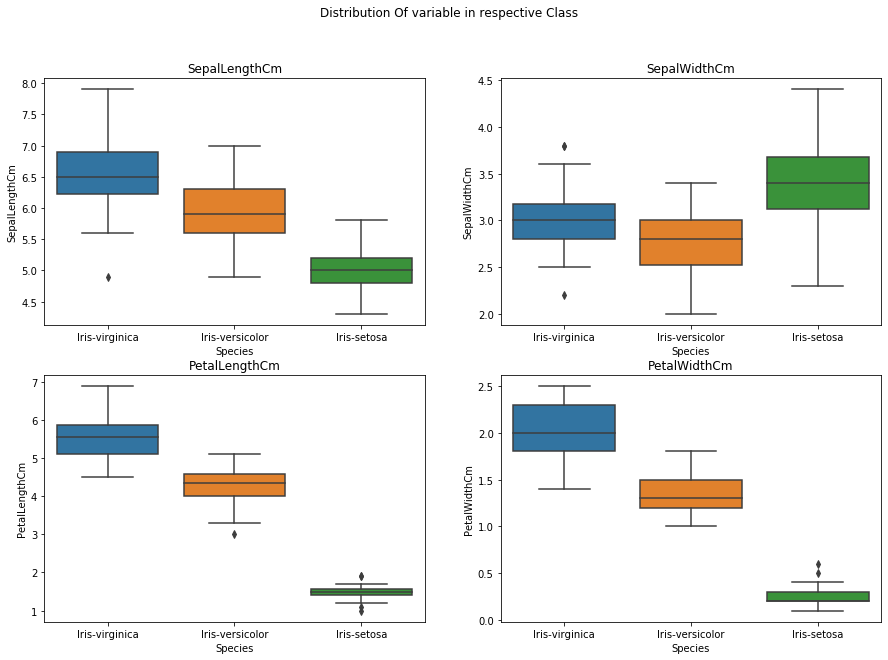

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Of variable in respective Class')
sns.boxplot(ax=axes[0, 0], x='Species',y="SepalLengthCm",data=data,order=['Iris-virginica','Iris-versicolor','Iris-setosa'])
axes[0, 0].set_title("SepalLengthCm")
sns.boxplot(ax=axes[0, 1], x='Species',y="SepalWidthCm",data=data,order=['Iris-virginica','Iris-versicolor','Iris-setosa'])
axes[0, 1].set_title("SepalWidthCm")
sns.boxplot(ax=axes[1, 0], x='Species',y="PetalLengthCm",data=data,order=['Iris-virginica','Iris-versicolor','Iris-setosa'])
axes[1, 0].set_title("PetalLengthCm")
sns.boxplot(ax=axes[1, 1], x='Species',y="PetalWidthCm",data=data,order=['Iris-virginica','Iris-versicolor','Iris-setosa'])
axes[1, 1].set_title("PetalWidthCm")

Now we can observe the distribution of each dependant varible on the target variable. And also we can observe some relation between the variables and traget values.

###### Identifying the corelation between the features

In [12]:
data.corr() # Identifying the corelation between the features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


    OBSERVATIONS : 
    --------------
    We can observe that the correlation between "SepalLengthCm" and "SepalWidthCm" is less 
    But the correlation between the "PetalLengthCm" and "PetalWidthCm" is high
    And also we can observe some correaltion between the "SepalLengthCm" and "PetalLengthCm"

###### Lets see the heatmap of correaltion

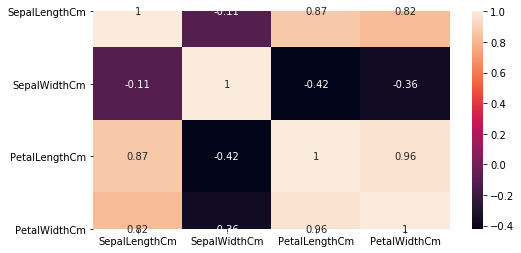

In [13]:
plt.figure(figsize=(8,4)) 
sns.heatmap(data.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

###### Splitting The Data into Training And Testing Dataset

In [14]:
train, test = train_test_split(data, test_size = 0.3, shuffle=True, random_state=42)# Splitting the dataset into train and test set with 
# 70% in train and 30% in test to validate the model
print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (105, 5)
Shape of train dataset : (45, 5)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [16]:
target_classes = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

###### Training the model using the Support vector Machine

In [17]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the SVM is : {accuracy*100}%')#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is : 100.0%


Lets plot the confusion matrix for the SVM model

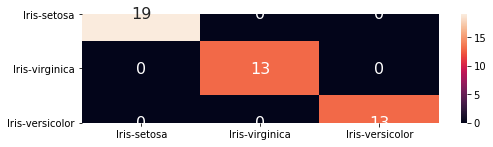

In [18]:
plt.figure(figsize=(8,2))
cm = pd.DataFrame(confusion_matrix(prediction,test_y), columns=target_classes, index=target_classes)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

    OBSERVATIONS
    1) As we can see that the accuracy of the SVM model is 100% which means that the model correctlly predicted 
       the class for all the test reords.
    2) That is why we can only see the values in the diagonal of the heat map and other values are zero.

###### Training the model using the Logistic Regression Model

In [19]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Logistic Regression is : {accuracy*100}%')

The accuracy of the Logistic Regression is : 97.77777777777777%


Lets plot the confusion matrix for the Logistic Regression Model

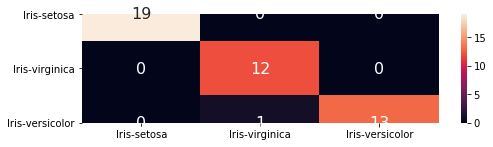

In [20]:
plt.figure(figsize=(8,2))
cm = pd.DataFrame(confusion_matrix(prediction,test_y), columns=target_classes, index=target_classes)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

    OBSERVATIONS
    1) The accuracy of the Logistic Regression model is 97.78%
    2) We can observe from the heat map that one record from the test dataset which is Iris-versicolor is 
       incorrectly predicted as Iris-virginica

###### Training the model using the Decision Tree

In [21]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Decision Tree is : {accuracy*100}%')

The accuracy of the Decision Tree is : 100.0%


Lets plot the confusion matrix for the Decision Tree

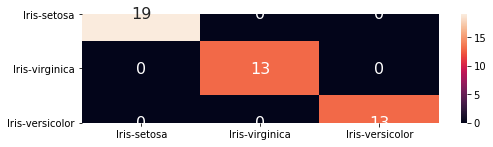

In [22]:
plt.figure(figsize=(8,2))
cm = pd.DataFrame(confusion_matrix(prediction,test_y), columns=target_classes, index=target_classes)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

    OBSERVATIONS
    1) As we can see that the accuracy of the Decision Tree is 100% which means that the model correctlly 
       predicted the class for all the test reords.
    2) We can observe that only the diagonal elements of the heat map has values and remaining values are '0'

###### Training the model using the KNN algorithm

In [23]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the KNN is : {accuracy*100}%')


The accuracy of the KNN is : 100.0%


Lets plot the confusion matrix for KNN

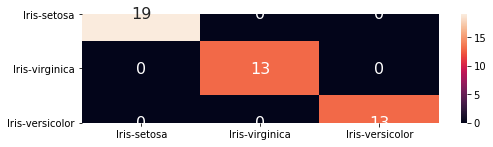

In [24]:
plt.figure(figsize=(8,2))
cm = pd.DataFrame(confusion_matrix(prediction,test_y), columns=target_classes, index=target_classes)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

    OBSERVATIONS
    1) As we can see that the accuracy of the KNN is 100% which means that the model correctlly predicted the 
       class for all the test reords.
    2) We can observe that only the diagonal elements of the heat map has values and remaining values are '0'

    FINAL OBSERVATIONS
    -------------------
    
    1) The dataset has three classes in target variable and it is balanced.
    2) We can observe some correlation between some feature in the dataset which can help the model to 
       differentiate between each calss.
    3) As the dataset is small and balanced we can see that all models performed with 100% accuracy on the test 
       dataset except the Logistic Regression    